In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folderlist = []

for folder in os.listdir('Images'):
    breed = folder.split('-')[1]
    count = len(os.listdir(os.path.join('Images',folder)))
    folderlist.append((breed, count))
    
df = pd.DataFrame(folderlist, columns = ['Breed', 'Num Images'])
df

,Breed,Num Images
0,pug,200
1,boxer,151
2,English_setter,161
3,American_Staffordshire_terrier,164
4,Blenheim_spaniel,188
...,...,...
115,flat,152
116,papillon,196
117,Airedale,202
118,Siberian_husky,192


In [3]:
len(df['Breed'])

120

/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


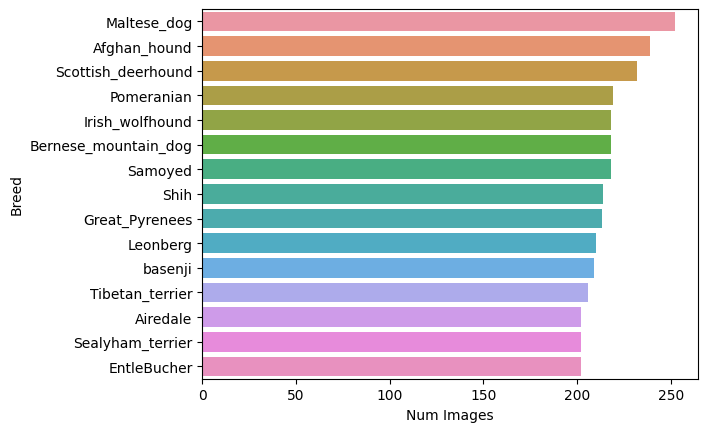

In [4]:

ax = sns.barplot(df.sort_values('Num Images', ascending=False).head(15), y='Breed', x='Num Images')
ax.set_xticks([0, 50, 100, 150, 200, 250])

/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


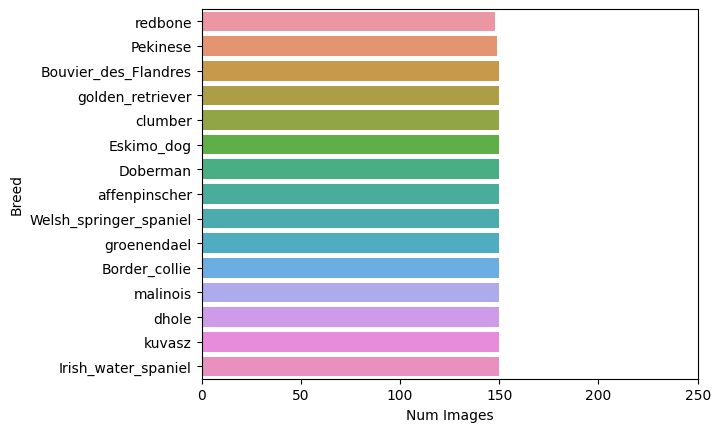

In [5]:
ax = sns.barplot(df.sort_values('Num Images', ascending=True).head(15), y='Breed', x='Num Images')
ax.set_xticks([0, 50, 100, 150, 200, 250])

In [6]:
df['Num Images'].describe()

count    120.000000
mean     171.500000
std       23.220898
min      148.000000
25%      152.750000
50%      159.500000
75%      186.250000
max      252.000000
Name: Num Images, dtype: float64

In [23]:
mnasnet_df = pd.read_csv('Results/mnasnet0_5.pth.csv')
mobilenet_large_df = pd.read_csv('Results/mobilenet_v3_large.pth.csv')
mobilenet_small_df = pd.read_csv('Results/mobilenet_v3_small.pth.csv')
shufflenet_x0_5_df = pd.read_csv('Results/shufflenet_v2_x0_5.pth.csv')
shufflenet_x1_0_df = pd.read_csv('Results/shufflenet_v2_x1_0.pth.csv')
tiny_vit_5m_df = pd.read_csv('Results/tiny_vit_5m.pth.csv')
tiny_vit_5m_df = tiny_vit_5m_df.drop(list(range(10,25)), axis = 0)

In [24]:
train_df = pd.concat([mnasnet_df,
                      mobilenet_large_df,
                      mobilenet_small_df,
                      shufflenet_x0_5_df,
                      shufflenet_x1_0_df,
                      tiny_vit_5m_df],
                     axis=0).reset_index(drop=True)

In [25]:
train_df['Model'] = train_df['Model'].apply(lambda x: x.split('.')[0])
train_df

,Model,Epoch,Accuracy,Train Loss,Val Loss,Epoch Time
0,mnasnet0_5,1,5.000000,4.727417,4.753049,49.081547
1,mnasnet0_5,2,10.583333,4.675021,4.671231,48.298681
2,mnasnet0_5,3,16.000000,4.593451,4.643869,48.862350
3,mnasnet0_5,4,16.916667,4.495576,4.456336,49.431366
4,mnasnet0_5,5,18.916667,4.272946,4.349743,49.057499
5,mnasnet0_5,6,20.333333,4.114497,3.901621,49.480619
6,mnasnet0_5,7,21.250000,3.762772,3.516851,49.610076
7,mnasnet0_5,8,22.500000,3.713149,3.350819,49.094240
8,mnasnet0_5,9,22.750000,3.419158,3.254603,48.966758
9,mnasnet0_5,10,23.166667,3.328459,3.341799,49.833820


/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


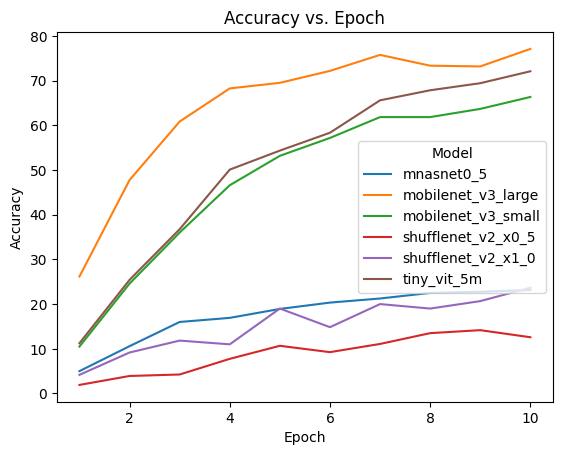

In [76]:
ax = sns.lineplot(x='Epoch', y='Accuracy', hue='Model',
             data = train_df).set_title('Accuracy vs. Epoch')
fig = ax.get_figure()
fig.savefig('figures/accuracy_vs_epoch.png')

/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ajk4yq/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='Epoch', ylabel='Epoch Time'>

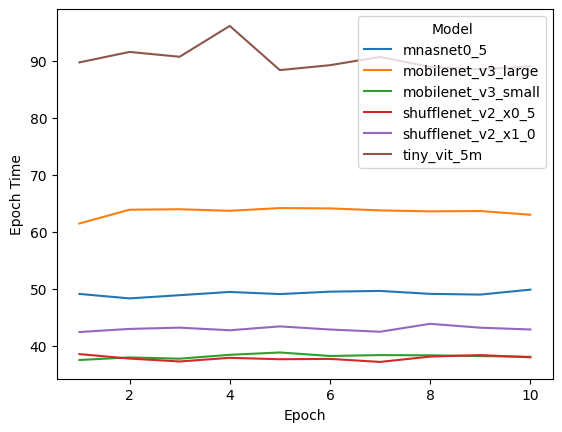

In [27]:
sns.lineplot(x='Epoch', y='Epoch Time', hue='Model',
             data = train_df)

In [28]:
total_epoch_time = train_df[['Model','Epoch','Epoch Time']]
total_epoch_time['Total Time'] = total_epoch_time.groupby('Model')['Epoch Time'].transform(pd.Series.cumsum)
total_epoch_time

/tmp/ipykernel_8323/2384502178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_epoch_time['Total Time'] = total_epoch_time.groupby('Model')['Epoch Time'].transform(pd.Series.cumsum)


,Model,Epoch,Epoch Time,Total Time
0,mnasnet0_5,1,49.081547,49.081547
1,mnasnet0_5,2,48.298681,97.380228
2,mnasnet0_5,3,48.862350,146.242577
3,mnasnet0_5,4,49.431366,195.673943
4,mnasnet0_5,5,49.057499,244.731443
5,mnasnet0_5,6,49.480619,294.212061
6,mnasnet0_5,7,49.610076,343.822137
7,mnasnet0_5,8,49.094240,392.916377
8,mnasnet0_5,9,48.966758,441.883135
9,mnasnet0_5,10,49.833820,491.716955


In [68]:
pivot_df = total_epoch_time.pivot(index = 'Model', columns='Epoch', values='Epoch Time')
pivot_df = pivot_df
pivot_df

Epoch,1,2,3,4,5,6,7,8,9,10
Model,,,,,,,,,,
mnasnet0_5,49.081547,48.298681,48.862350,49.431366,49.057499,49.480619,49.610076,49.094240,48.966758,49.833820
mobilenet_v3_large,61.444294,63.861109,63.945861,63.670123,64.148163,64.090466,63.739184,63.570772,63.628201,62.981959
mobilenet_v3_small,37.491044,37.943947,37.718658,38.403806,38.810861,38.197891,38.348353,38.313337,38.178488,38.047777
shufflenet_v2_x0_5,38.522752,37.739377,37.230739,37.872336,37.624541,37.682199,37.152436,38.089206,38.353098,37.958277
shufflenet_v2_x1_0,42.396813,42.944170,43.166287,42.707397,43.387786,42.840412,42.448439,43.839195,43.156512,42.846457
tiny_vit_5m,89.713524,91.544465,90.697973,96.108491,88.355602,89.218671,90.668504,88.919608,88.458928,89.025998


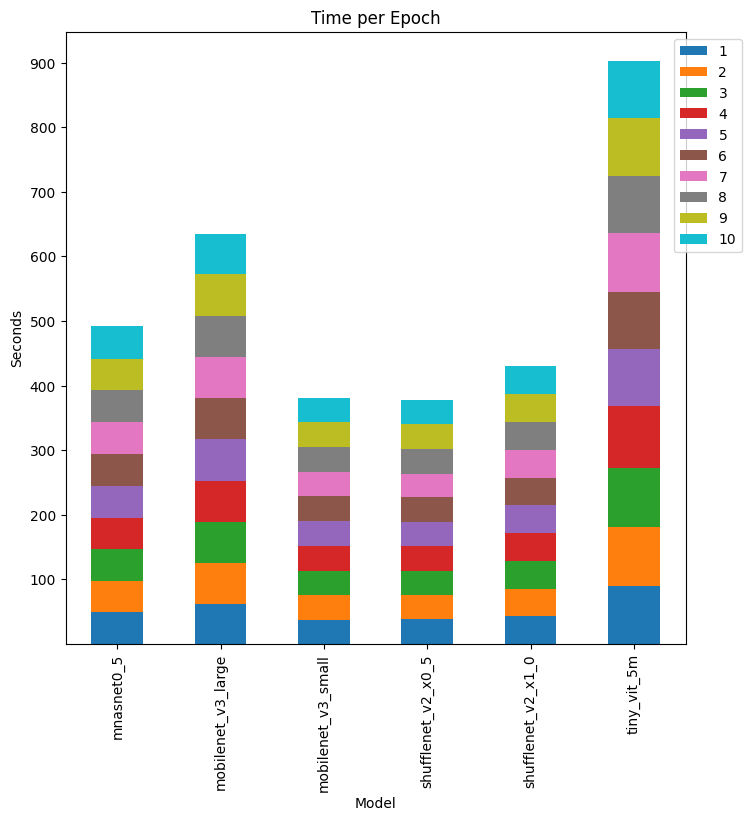

In [106]:
ax = pivot_df.plot(kind='bar', stacked=True, ylabel='Seconds', title="Time per Epoch")
ax.legend(bbox_to_anchor=(.97,1))
ax.yaxis.set_ticks(np.arange(100,1000,100))
fig = ax.get_figure()
fig.set_figwidth(8)
fig.set_figheight(9)
fig.subplots_adjust(bottom=0.2)
fig.savefig('figures/time_per_epoch.png')


In [51]:
pivot_df[1]

0    49.081547
1    61.444294
2    37.491044
3    38.522752
4    42.396813
5    89.713524
Name: 1, dtype: float64